In [3]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#added this because it's indicated as useful but not imported
import urllib
from zipfile import ZipFile
from io import BytesIO
import os
import json
from bs4 import BeautifulSoup as bs
import re

from matplotlib import animation, rc
from IPython.display import display, HTML
import sys
import urllib
import urllib.request
from urllib.request import urlretrieve

import json
from pprint import pprint

import sklearn.cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
import openpyxl

In [4]:
files = ["https://www.huduser.gov/portal/datasets/fmr/fmr2010f/FY2010_4050_Final_PostRDDs.xls",
         "https://www.huduser.gov/portal/datasets/fmr/fmr2011f/fy2011_equiv_zc_rents_acs.xls",
         "https://www.huduser.gov/portal/datasets/fmr/fmr2012f/small_area_fmrs_fy2012.xls",
         "https://www.huduser.gov/portal/datasets/fmr/fmr2013p/small_area_fmrs_fy2013.xls",
         "https://www.huduser.gov/portal/datasets/fmr/fmr2014f/small_area_fmrs_fy2014.xls"]
print('1111111')        

1111111


In [5]:
def yearly_spreedsheet(file):
    f    = (file)
    data = pd.read_excel(f)
    return (data)
df_10 = yearly_spreedsheet(files[0])
df_11 = yearly_spreedsheet(files[1])
df_12 = yearly_spreedsheet(files[2])
df_13 = yearly_spreedsheet(files[3])
df_14 = yearly_spreedsheet(files[4])

In [6]:
#Simple package for dealing with zip codes in python.
#you need to install it in your terminal as follows
#pip install zipcode
import zipcode
myzip = zipcode.isequal('11205')
myzip.state     
myzip.city    

'BROOKLYN'

In [7]:
#save the data in array inorder to modify some attributes 
rent_per_year = [df_10,df_11,df_12,df_13,df_14]
for i in range(len(rent_per_year)):
    for j in rent_per_year[i].columns.values:
        if j == 'zip' or j == 'ZIP':
            rent_per_year[i].rename(columns={j: 'ZIP' }, inplace=True)
        if j == 'countyname' or j == 'County Name' or j == 'County_Name':
            rent_per_year[i].rename(columns={j: 'CountyName' }, inplace=True)
        if j == 'State Name' or j == 'state_alpha':
            rent_per_year[i].rename(columns={j: 'StateName' }, inplace=True)
        if j == 'area_rent_br0' or j == 'fmr0':
            rent_per_year[i].rename(columns={j: 'rent0' }, inplace=True)
        if j == 'area_rent_br1' or j == 'fmr1':
            rent_per_year[i].rename(columns={j: 'rent1' }, inplace=True)
        if j == 'area_rent_br2' or j == 'fmr2':
            rent_per_year[i].rename(columns={j: 'rent2' }, inplace=True)
        if j == 'area_rent_br3' or j == 'fmr3':
            rent_per_year[i].rename(columns={j: 'rent3' }, inplace=True)
        if j == 'area_rent_br4' or j == 'fmr4':
            rent_per_year[i].rename(columns={j: 'rent4' }, inplace=True)
print(rent_per_year)

[            FIPS  rent0  rent1  rent2  rent3  rent4  county  State  CouSub  \
0      100199999    552    653    735    975   1287       1      1   99999   
1      100399999    534    643    764   1013   1160       3      1   99999   
2      100599999    448    449    539    667    687       5      1   99999   
3      100799999    593    659    735    933    960       7      1   99999   
4      100999999    593    659    735    933    960       9      1   99999   
5      101199999    397    449    550    659    710      11      1   99999   
6      101399999    397    449    550    659    710      13      1   99999   
7      101599999    426    471    585    773    909      15      1   99999   
8      101799999    445    483    536    727    750      17      1   99999   
9      101999999    464    465    560    667    688      19      1   99999   
10     102199999    398    550    612    769    881      21      1   99999   
11     102399999    444    469    536    680    908      23    

In [8]:
df_14 = df_14[(df_14.CountyName == 'Kings County') & (df_14.StateName == 'New York')]
df_14 = df_14[['StateName','CountyName','rent0','rent1','rent2','rent3','rent4','ZIP']]
df_14.head()

,StateName,CountyName,rent0,rent1,rent2,rent3,rent4,ZIP
14328,New York,Kings County,1540,1610,1910,2480,2930,11201
14329,New York,Kings County,1070,1110,1320,1720,2020,11202
14330,New York,Kings County,1000,1050,1240,1610,1900,11203
14331,New York,Kings County,1070,1110,1320,1720,2020,11204
14332,New York,Kings County,1260,1320,1560,2030,2390,11205


In [9]:
df_14['Rent_Mean'] = df_14[["rent0", "rent1","rent2", "rent3","rent4"]].mean(numeric_only=True,axis=1)
df_14.head(30)
df_14.to_csv('Brooklyn_Rent_2014.csv')

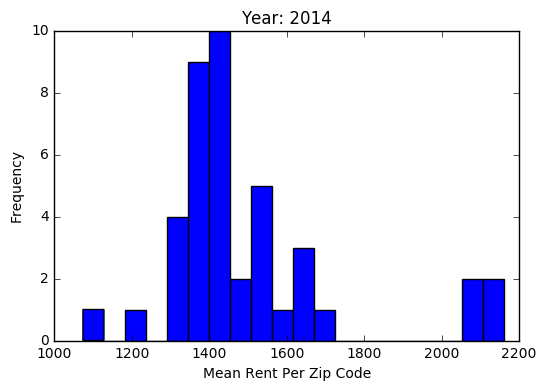

In [10]:
year = 2014
plt.plot(subplots=True)
plt.hist(df_14['Rent_Mean'].values, bins = 20)
plt.title('Year: %i' % year)
plt.xlabel('Mean Rent Per Zip Code')
plt.ylabel('Frequency')
plt.show()

In [11]:
df_13 = df_13[(df_13.CountyName == 'Kings County') & (df_13.StateName == 'New York')]
df_13 = df_13[['StateName','CountyName','rent0','rent1','rent2','rent3','rent4','ZIP']]
df_13['Rent_Mean'] = df_13[["rent0", "rent1","rent2", "rent3","rent4"]].mean(numeric_only=True,axis=1)
df_13.head()

,StateName,CountyName,rent0,rent1,rent2,rent3,rent4,ZIP,Rent_Mean
14293,New York,Kings County,1550,1620,1920,2500,2940,11201,2106.0
14294,New York,Kings County,1070,1120,1330,1730,2040,11202,1458.0
14295,New York,Kings County,1010,1050,1250,1630,1920,11203,1372.0
14296,New York,Kings County,1070,1120,1330,1730,2040,11204,1458.0
14297,New York,Kings County,1270,1320,1570,2040,2410,11205,1722.0


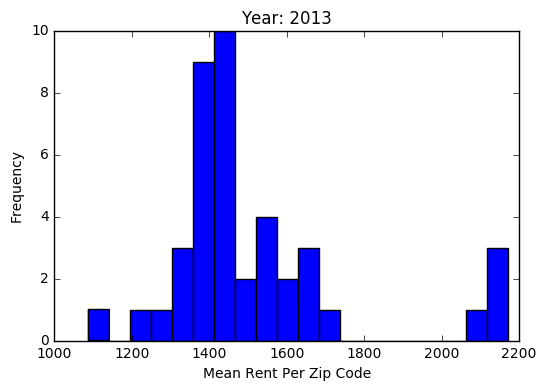

In [12]:
year = 2013
plt.plot(subplots=True)
plt.hist(df_13['Rent_Mean'].values, bins = 20)
plt.title('Year: %i' % year)
plt.xlabel('Mean Rent Per Zip Code')
plt.ylabel('Frequency')
plt.show()

In [11]:
df_12 = df_12[(df_12.CountyName == 'Kings County') & (df_12.StateName == 'New York')]
df_12 = df_12[['StateName','CountyName','rent0','rent1','rent2','rent3','rent4','ZIP']]
df_12.head()

,StateName,CountyName,rent0,rent1,rent2,rent3,rent4,ZIP
13751,New York,Kings County,1500,1640,1870,2360,2860,11201
13752,New York,Kings County,980,1070,1220,1540,1860,11203
13753,New York,Kings County,1050,1150,1310,1650,2000,11204
13754,New York,Kings County,1150,1260,1440,1820,2200,11205
13755,New York,Kings County,890,970,1110,1400,1690,11206


In [12]:
df_12['Rent_Mean'] = df_12[["rent0", "rent1","rent2", "rent3","rent4"]].mean(numeric_only=True, axis=1)
df_12.head()

,StateName,CountyName,rent0,rent1,rent2,rent3,rent4,ZIP,Rent_Mean
13751,New York,Kings County,1500,1640,1870,2360,2860,11201,2046.0
13752,New York,Kings County,980,1070,1220,1540,1860,11203,1334.0
13753,New York,Kings County,1050,1150,1310,1650,2000,11204,1432.0
13754,New York,Kings County,1150,1260,1440,1820,2200,11205,1574.0
13755,New York,Kings County,890,970,1110,1400,1690,11206,1212.0


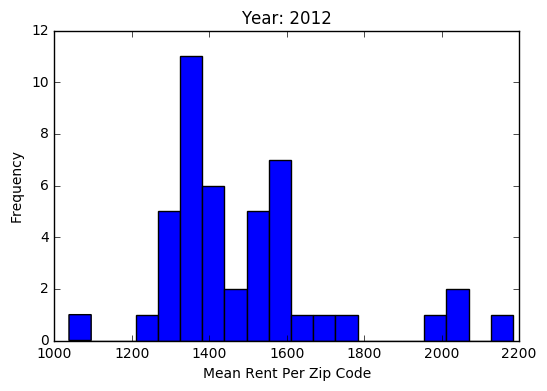

In [13]:
year = 2012
plt.plot(subplots=True)
plt.hist(df_12['Rent_Mean'].values, bins = 20)
plt.title('Year: %i' % year)
plt.xlabel('Mean Rent Per Zip Code')
plt.ylabel('Frequency')
plt.show()

In [14]:
df_11 = df_11[(df_11.CountyName == 'Kings County') & (df_11.state == 36)]
df_11 = df_11[['state','CountyName','rent0','rent1','rent2','rent3','rent4','ZIP']]
df_11['Rent_Mean'] = df_11[["rent0", "rent1","rent2", "rent3","rent4"]].mean(numeric_only=True, axis=1)
df_11.head()

,state,CountyName,rent0,rent1,rent2,rent3,rent4,ZIP,Rent_Mean
12321,36,Kings County,1060,1130,1280,1590,1760,10016,1364.0
12322,36,Kings County,1530,1630,1840,2280,2520,11201,1960.0
12323,36,Kings County,1040,1110,1250,1550,1720,11203,1334.0
12324,36,Kings County,1070,1140,1290,1600,1770,11204,1374.0
12325,36,Kings County,1170,1250,1410,1750,1930,11205,1502.0


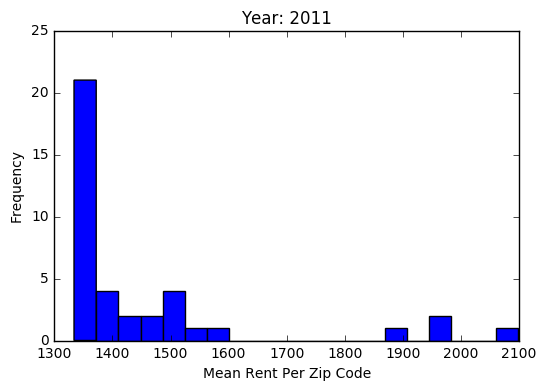

In [15]:
year = 2011
plt.plot(subplots=True)
plt.hist(df_11['Rent_Mean'].values, bins = 20)
plt.title('Year: %i' % year)
plt.xlabel('Mean Rent Per Zip Code')
plt.ylabel('Frequency')
plt.show()

In [16]:
df_10 = df_10[(df_10.CountyName == 'Kings County') & (df_10.StateName == 'NY')]
df_10 = df_10[['StateName','CountyName', 'rent0','rent1','rent2','rent3','rent4']]
df_10['Rent_Mean'] = df_10[["rent0", "rent1","rent2", "rent3","rent4"]].mean(numeric_only=True, axis=1)
df_10.head()

,StateName,CountyName,rent0,rent1,rent2,rent3,rent4,Rent_Mean
3113,NY,Kings County,1129,1222,1359,1672,1880,1452.4


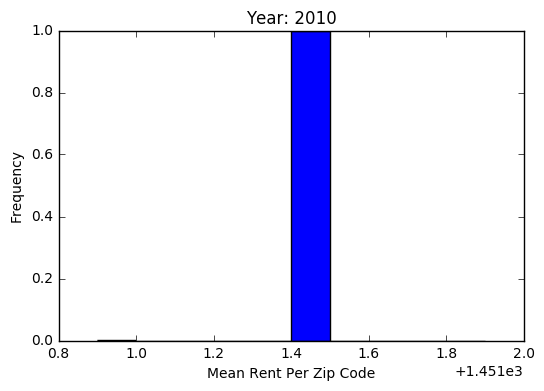

In [17]:
year = 2010
plt.plot(subplots=True)
plt.hist(df_10['Rent_Mean'].values)
plt.title('Year: %i' % year)
plt.xlabel('Mean Rent Per Zip Code')
plt.ylabel('Frequency')
plt.show()